In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(r"./data/investor_profiles.csv")
df.head()

,AgeGroup,RiskTolerance,InvestmentGoal,IncomeLevel,RecommendedPortfolio
0,Senior,Medium,Education,High,Balanced
1,Young,Medium,Education,High,Equity
2,Senior,High,Education,Low,Equity
3,Senior,Medium,Education,Low,FixedIncome
4,Young,Low,Wealth Growth,Low,Equity


In [41]:
#you may say 'Chaz Why did you turn your categorical data into numbers when you want to use decision tree'
# Well, because I am using scikit-learn and scikit-learn requires encoding (e.g., one-hot encoding or label encoding)
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [43]:
df

,AgeGroup,RiskTolerance,InvestmentGoal,IncomeLevel,RecommendedPortfolio
0,1,2,0,0,0
1,2,2,0,0,1
2,1,0,0,1,1
3,1,2,0,1,2
4,2,1,2,1,1
...,...,...,...,...,...
495,0,2,1,1,1
496,0,2,1,0,1
497,2,0,1,2,2
498,0,0,0,0,2


In [45]:
X = df.drop("RecommendedPortfolio", axis=1)
y = df["RecommendedPortfolio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:

dt = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [19]:
y_pred = dt.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.25      0.42      0.31        48
           1       0.40      0.21      0.27        58
           2       0.30      0.27      0.29        44

    accuracy                           0.29       150
   macro avg       0.32      0.30      0.29       150
weighted avg       0.32      0.29      0.29       150



In [ ]:
#we should look for ways to improve the performance of our models

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}



In [64]:
#let's use gridsearch with cross validation to find the best max_depth value
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# now let's fit it to the the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [66]:
# let's see the difference the best parameters and model
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27        48
           1       0.45      0.52      0.48        58
           2       0.36      0.23      0.28        44

    accuracy                           0.36       150
   macro avg       0.35      0.35      0.34       150
weighted avg       0.36      0.36      0.35       150



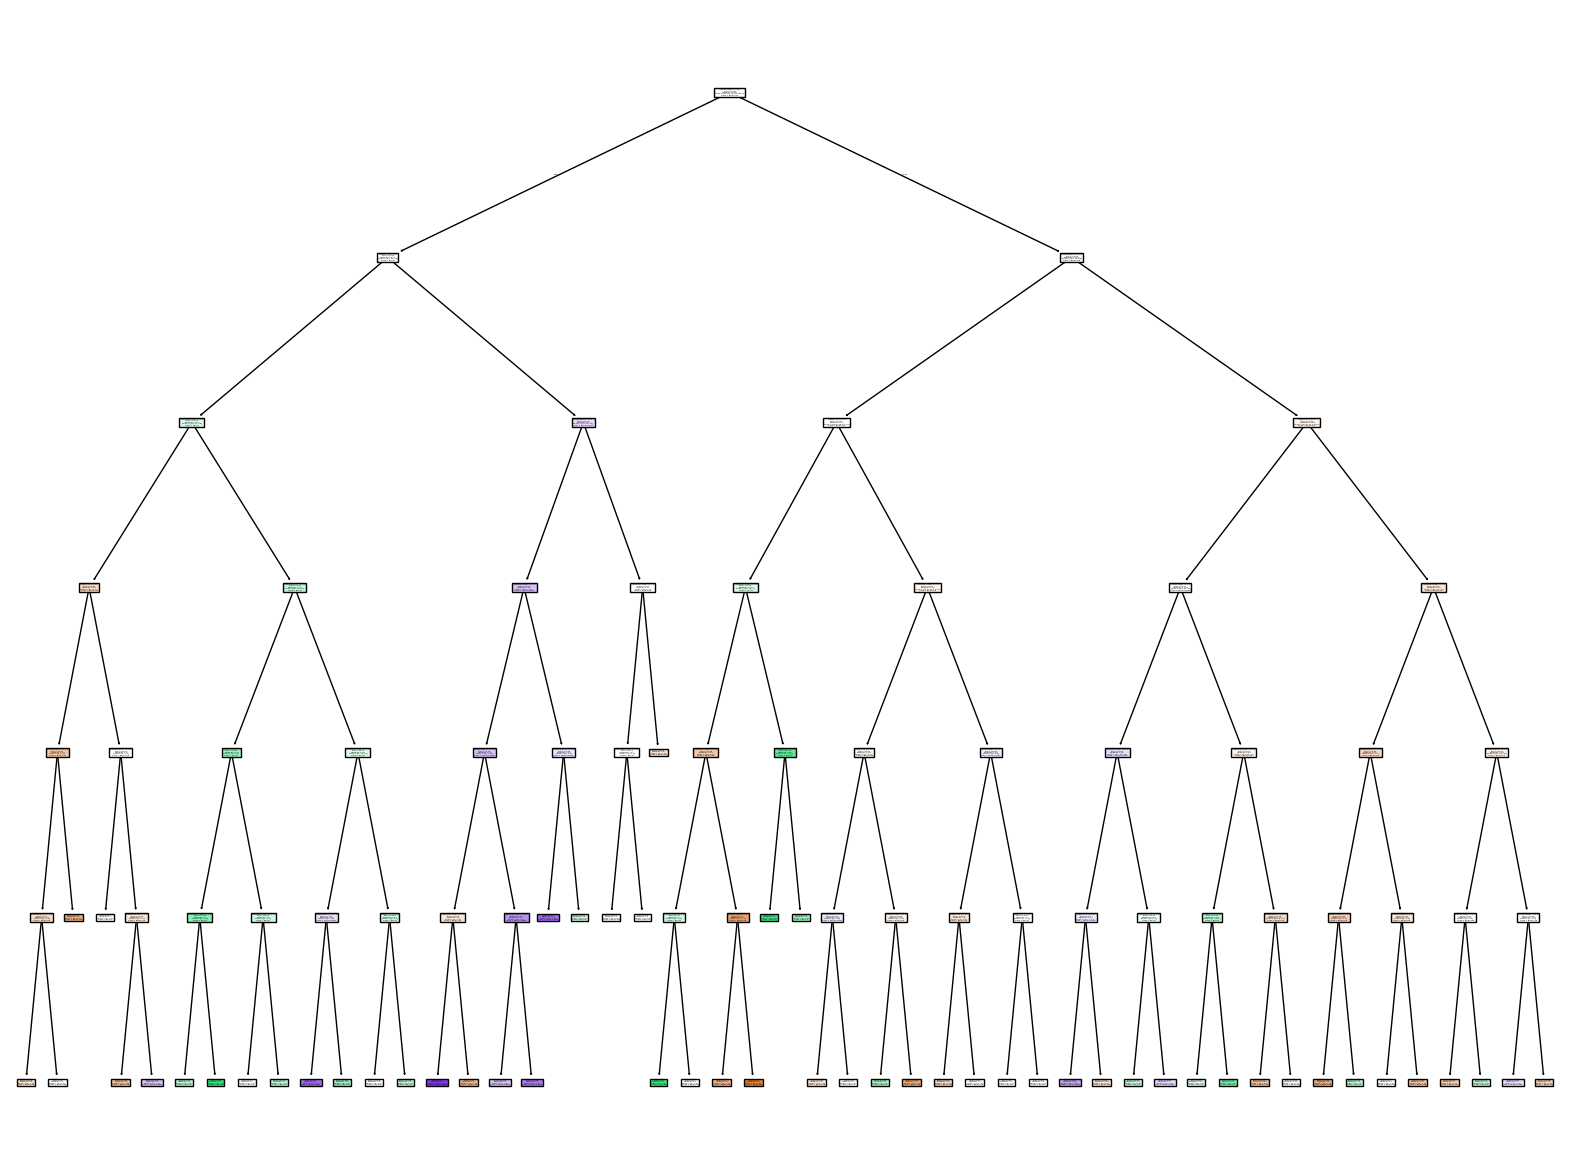

In [70]:
#let's plot the tree
plt.figure(figsize=(20,15))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=label_encoders['RecommendedPortfolio'].classes_)
plt.show()


In [ ]:
#What the heck! it's all numbers and it's not readable. give me a better view

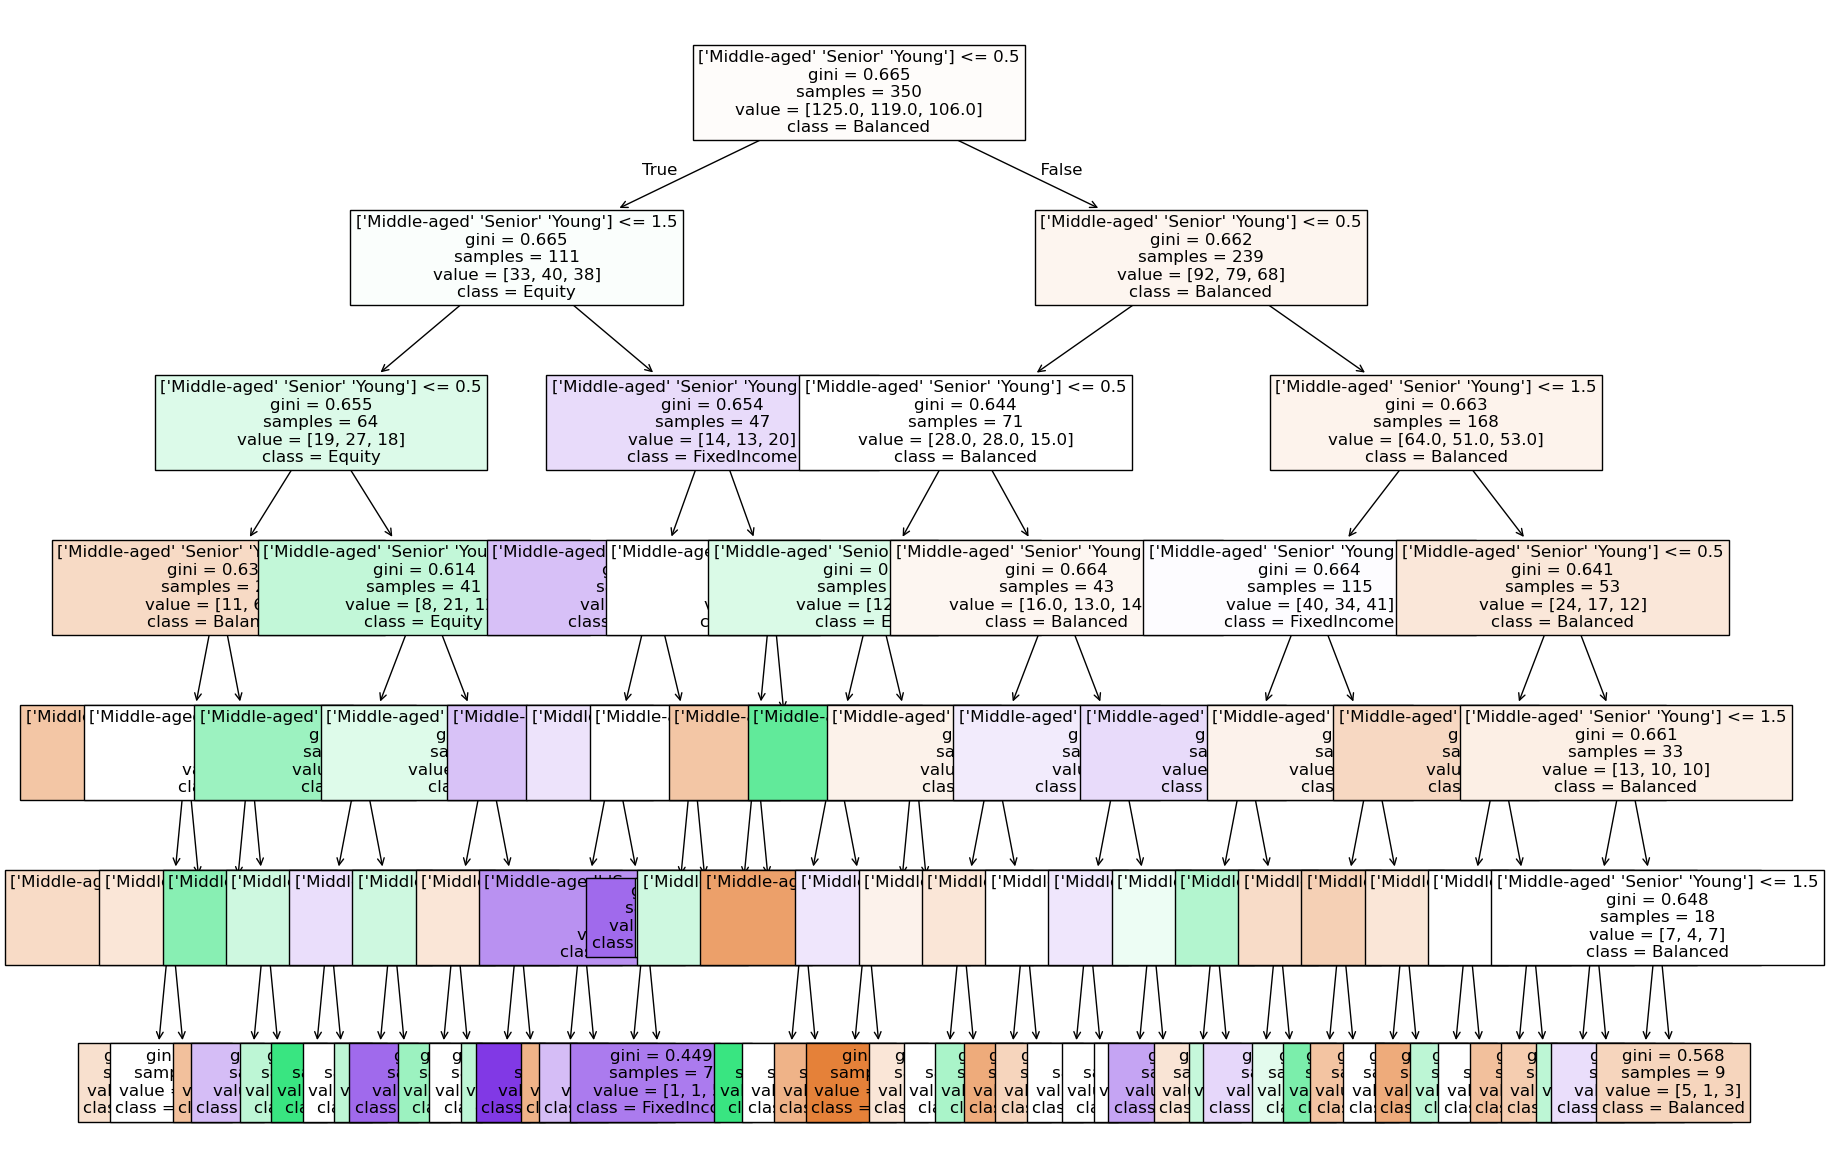

In [60]:
inverse_labels = {col: le.classes_ for col, le in label_encoders.items()}

# Map the column names back to original categorical values
original_feature_names = []
for col in X.columns:
    original_feature_names.append([inverse_labels[col] for col in X.columns if col in inverse_labels][0])

# Increase the figure size and plot the decision tree
plt.figure(figsize=(20, 15))  # Larger figure size
plot_tree(best_model, 
          filled=True, 
          feature_names=original_feature_names,  # Use original categorical feature names
          class_names=label_encoders['RecommendedPortfolio'].classes_, 
          fontsize=12)
plt.show()